#### GDA

This one is pretty straightforward in terms of coding, but not so much in pen and paper work.

In [36]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.cm as cm

In [37]:
data = pd.concat([pd.read_table('q4x.dat', names = ['x1','x2'],delim_whitespace=True),pd.read_table('q4y.dat', names = ['y'])], axis=1)

First we use the results obtained by GDA to find out the mean and variance for each class.

Then we do a lot of math using pen and paper and get the formula for equal posterior inference probs.

In [38]:
inputs = data.values[:,0:2].astype('float')
inputs_mean = np.mean(inputs, axis=0)
inputs_std = np.std(inputs,axis=0)
inputs = (inputs - inputs_mean)/(inputs_std + np.finfo(float).eps)

inputs_alaska = inputs[np.where(data.values[:,2] == 'Alaska')]
inputs_canada = inputs[np.where(data.values[:,2] == 'Canada')]

phi = inputs_alaska.shape[0]/inputs.shape[0]
mu_0 = np.mean(inputs_alaska,axis=0)
mu_1 = np.mean(inputs_canada,axis=0)
p = np.concatenate((inputs_alaska - mu_0,inputs_canada - mu_1))
sigma = p.T.dot(p)/inputs.shape[0]

print(phi)
print(mu_0)
print(mu_1)
print(sigma)

A = 2* (mu_0.T - mu_1.T).dot(np.linalg.inv(sigma))
B = mu_0.T.dot(np.linalg.inv(sigma)).dot(mu_0) - mu_1.T.dot(np.linalg.inv(sigma)).dot(mu_1) - 2*np.log((1-phi)/phi)


0.5
[-0.75529433  0.68509431]
[ 0.75529433 -0.68509431]
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


Let's plot the data with the gaussians with mean and variance as above.

<IPython.core.display.Javascript object>


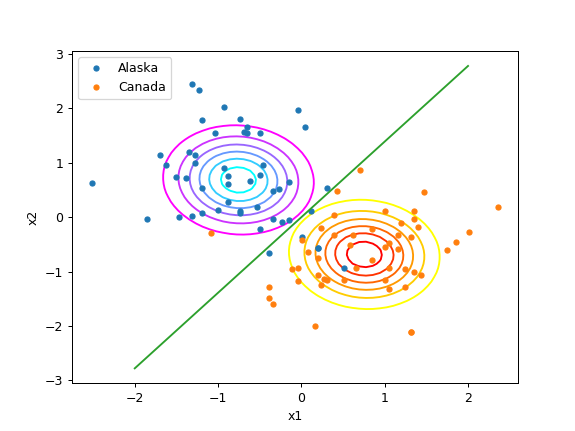

In [39]:
fig, ax = plt.subplots()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax.plot(inputs_alaska[:,0], inputs_alaska[:,1], marker='o', linestyle='', ms=4, label='Alaska')
ax.plot(inputs_canada[:,0], inputs_canada[:,1], marker='o', linestyle='', ms=4, label='Canada')
ax.legend()

x = np.linspace(-2,2)
y = (B - A[0]*x)/(A[1])

ax.plot(x,y)

x_save = x
y_save = y # For next part

def gauss(x,mu,sigma):
    mat_multi=np.dot((x-mu).dot(np.linalg.inv(sigma)),(x-mu).T)
    return np.exp(-1*(mat_multi))

x = np.linspace(-2,2)
y = np.linspace(-2,2)
x,y = np.meshgrid(x,y)
z_0 = np.empty(x.size)
tempweights = np.concatenate((x.reshape((x.size,1)),y.reshape((y.size,1))), axis=1)
for k in range(0,tempweights.shape[0]):
    z_0[k] = gauss(tempweights[k], mu_0, sigma)
z_0 = z_0.reshape(x.shape)

z_1 = np.empty(x.size)
tempweights = np.concatenate((x.reshape((x.size,1)),y.reshape((y.size,1))), axis=1)
for k in range(0,tempweights.shape[0]):
    z_1[k] = gauss(tempweights[k], mu_1, sigma)
z_1 = z_1.reshape(x.shape)

ax.contour(x,y,z_0,cmap = cm.cool_r)
ax.contour(x,y,z_1, cmap = cm.autumn_r)


Now, consider the case where the two distributions have different covariance.

In [40]:
mu_0 = np.mean(inputs_alaska,axis=0)
mu_1 = np.mean(inputs_canada,axis=0)
sigma_0 = (inputs_alaska - mu_0).T.dot(inputs_alaska - mu_0)/inputs_alaska.shape[0]
sigma_1 = (inputs_canada - mu_1).T.dot(inputs_canada - mu_1)/inputs_canada.shape[0]

print(mu_0)
print(mu_1)
print(sigma_0)
print(sigma_1)

A = np.linalg.inv(sigma_0) - np.linalg.inv(sigma_1)
B = -2* (mu_0.T.dot(np.linalg.inv(sigma_0)) - mu_1.T.dot(np.linalg.inv(sigma_1)))
C = mu_0.T.dot(np.linalg.inv(sigma_0)).dot(mu_0) - mu_1.T.dot(np.linalg.inv(sigma_1)).dot(mu_1) - 2*np.log(((1-phi)/phi)*(np.linalg.det(sigma_1)/np.linalg.det(sigma_0)))

[-0.75529433  0.68509431]
[ 0.75529433 -0.68509431]
[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
[[ 0.47747117  0.1099206 ]
 [ 0.1099206   0.41355441]]


<IPython.core.display.Javascript object>


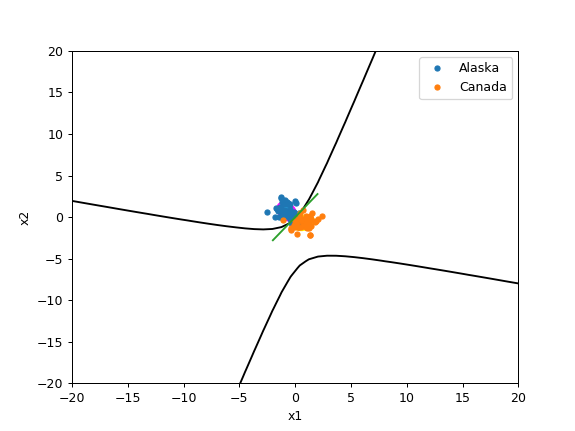

In [41]:
fig, ax = plt.subplots()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax.plot(inputs_alaska[:,0], inputs_alaska[:,1], marker='o', linestyle='', ms=4, label='Alaska')
ax.plot(inputs_canada[:,0], inputs_canada[:,1], marker='o', linestyle='', ms=4, label='Canada')
ax.legend()

def curve(X):
    return X.T.dot(A).dot(X) + B.dot(X) + C

x = np.linspace(-20,20)
y = np.linspace(-20,20)
x,y = np.meshgrid(x,y)
z = np.empty(x.size)
tempweights = np.concatenate((x.reshape((x.size,1)),y.reshape((y.size,1))), axis=1)
for k in range(0,tempweights.shape[0]):
    z[k] = curve(tempweights[k])
z = z.reshape(x.shape)
ax.contour(x,y,z,[0],cmap = cm.binary_r)


ax.plot(x_save ,y_save)


def gauss(x,mu,sigma):
    mat_multi=np.dot((x-mu).dot(np.linalg.inv(sigma)),(x-mu).T)
    return np.exp(-1*(mat_multi))

x = np.linspace(-2,2)
y = np.linspace(-2,2)
x,y = np.meshgrid(x,y)
z_0 = np.empty(x.size)
tempweights = np.concatenate((x.reshape((x.size,1)),y.reshape((y.size,1))), axis=1)
for k in range(0,tempweights.shape[0]):
    z_0[k] = gauss(tempweights[k], mu_0, sigma_0)
z_0 = z_0.reshape(x.shape)

z_1 = np.empty(x.size)
tempweights = np.concatenate((x.reshape((x.size,1)),y.reshape((y.size,1))), axis=1)
for k in range(0,tempweights.shape[0]):
    z_1[k] = gauss(tempweights[k], mu_1, sigma_1)
z_1 = z_1.reshape(x.shape)

ax.contour(x,y,z_0,cmap = cm.cool_r)
ax.contour(x,y,z_1, cmap = cm.autumn_r)
